Dataset:
    sell(USD/mmk)  sell(THB/mmk)  sell(CNY/mmk)  sell(JPY/mmk)
0            4500         133.33            633          29.60
1            4520         133.33            635          29.60
2            4540         133.33            635          29.60
3            4500         133.33            635          29.60
4            4500         133.33            635          29.60
..            ...            ...            ...            ...
86           4560         135.14            627          29.26
87           4550         135.14            631          29.42
88           4530         135.14            629          29.30
89           4550         135.14            629          29.54
90           4560         135.14            631          29.73

[91 rows x 4 columns]

Descriptive Statistics:
       sell(USD/mmk)  sell(THB/mmk)  sell(CNY/mmk)  sell(JPY/mmk)
count      91.000000      91.000000      91.000000      91.000000
mean     4509.340659     131.934176     622.417582     

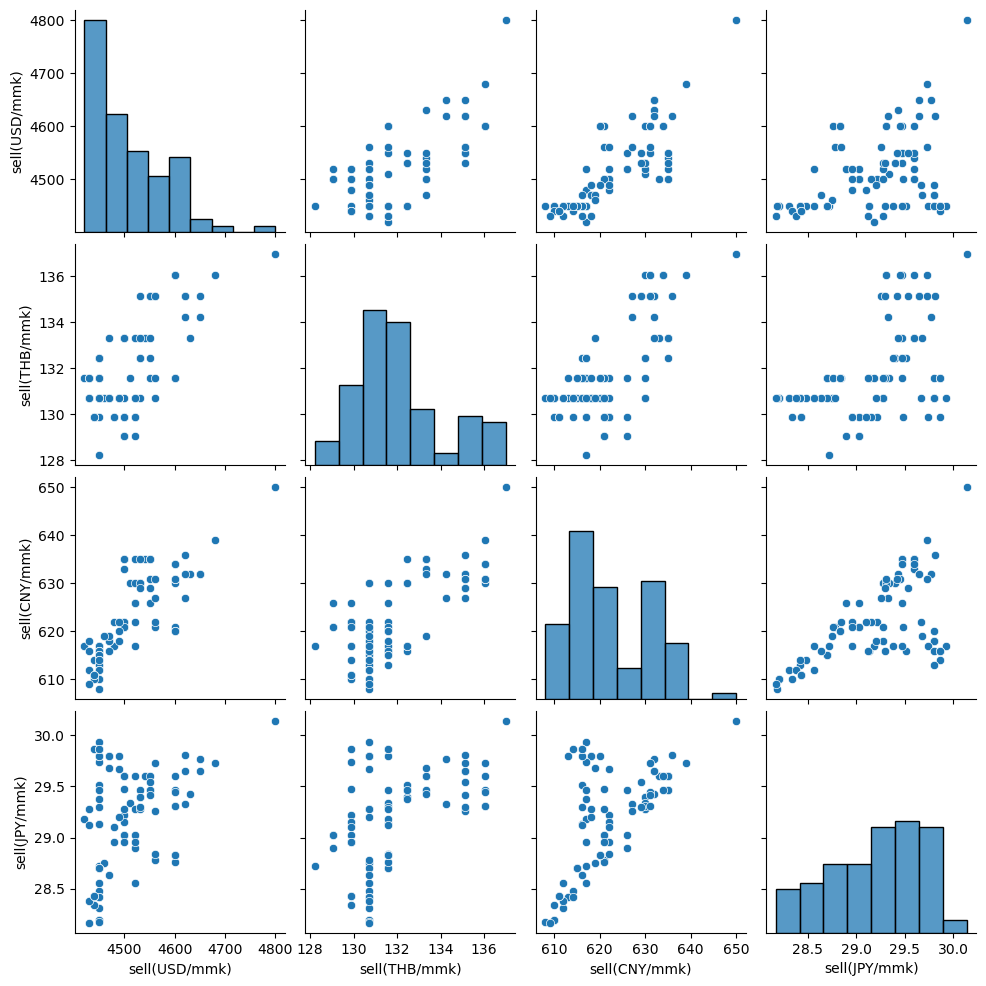

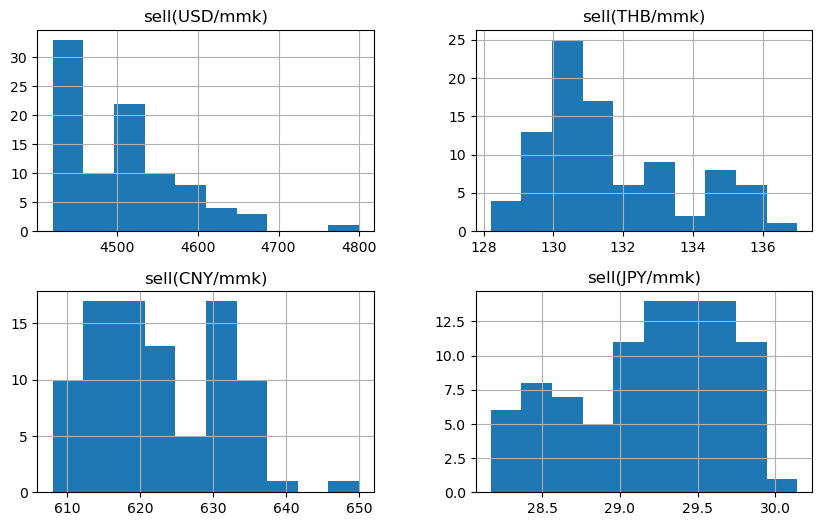

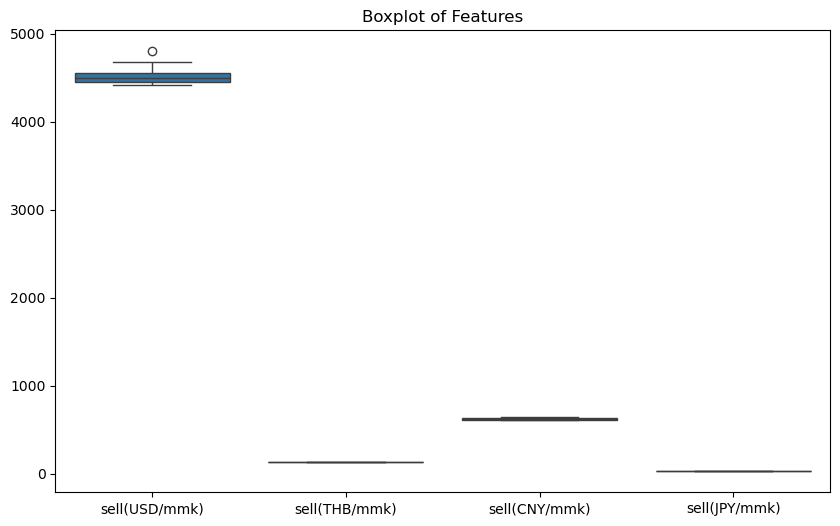

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis,skew
import matplotlib.pyplot as plt


#dataset
file_path='project1.xlsx'
df=pd.read_excel(file_path,usecols=['sell(USD/mmk)', 'sell(THB/mmk)', 'sell(CNY/mmk)','sell(JPY/mmk)'])
#Display
print('Dataset:')
print(df)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Additional Measures
print("\nAdditional Measures:")
# Calculate mean and standard deviation for each currency
currencies = ['sell(USD/mmk)', 'sell(THB/mmk)', 'sell(CNY/mmk)','sell(JPY/mmk)']
results = {}
for currency in currencies:

    print(f"Column: {currency}")
    print(f" Variance: {df[currency].var():.2f}")
    print(f" Skewness: {skew(df[currency]):.2f}")
    print(f" Kurtosis: {kurtosis(df[currency]):.2f}")
    print()


#Correlation and Covariance
print('Correlation Matrix:')
print(df.corr())
print('\nCovariance Matrix')
print(df.cov())

#Visualizng the data distribution (Optional)
import matplotlib.pyplot as plt
import seaborn as sns

#Pairplot
sns.pairplot(df)
plt.show()


#Histrogram
df.hist(bins=10,figsize=(10,6))
plt.show()

#Boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.show()



First 5 rows of the dataset:
        Date  sell(USD/mmk)  sell(THB/mmk)  sell(CNY/mmk)  sell(JPY/mmk)
0 2024-11-02           4500         133.33            633           29.6
1 2024-11-03           4520         133.33            635           29.6
2 2024-11-04           4540         133.33            635           29.6
3 2024-11-05           4500         133.33            635           29.6
4 2024-11-06           4500         133.33            635           29.6

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           91 non-null     datetime64[ns]
 1   sell(USD/mmk)  91 non-null     int64         
 2   sell(THB/mmk)  91 non-null     float64       
 3   sell(CNY/mmk)  91 non-null     int64         
 4   sell(JPY/mmk)  91 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memo

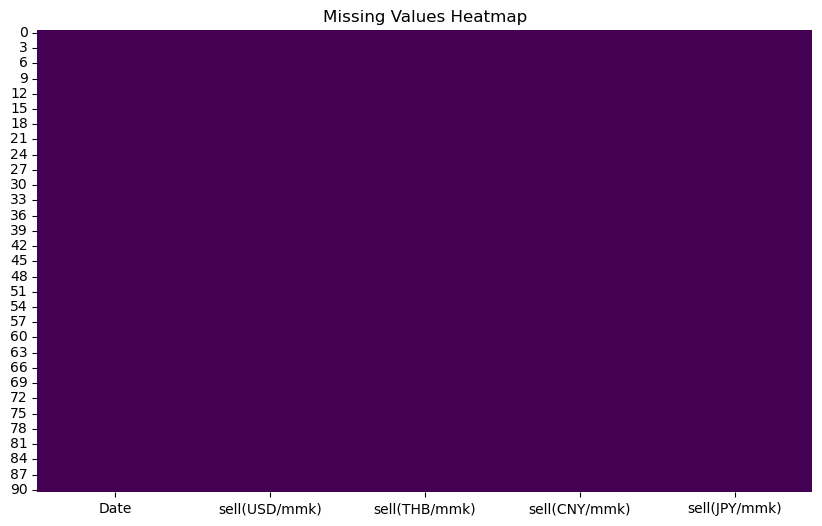


Distribution of Numeric Columns:


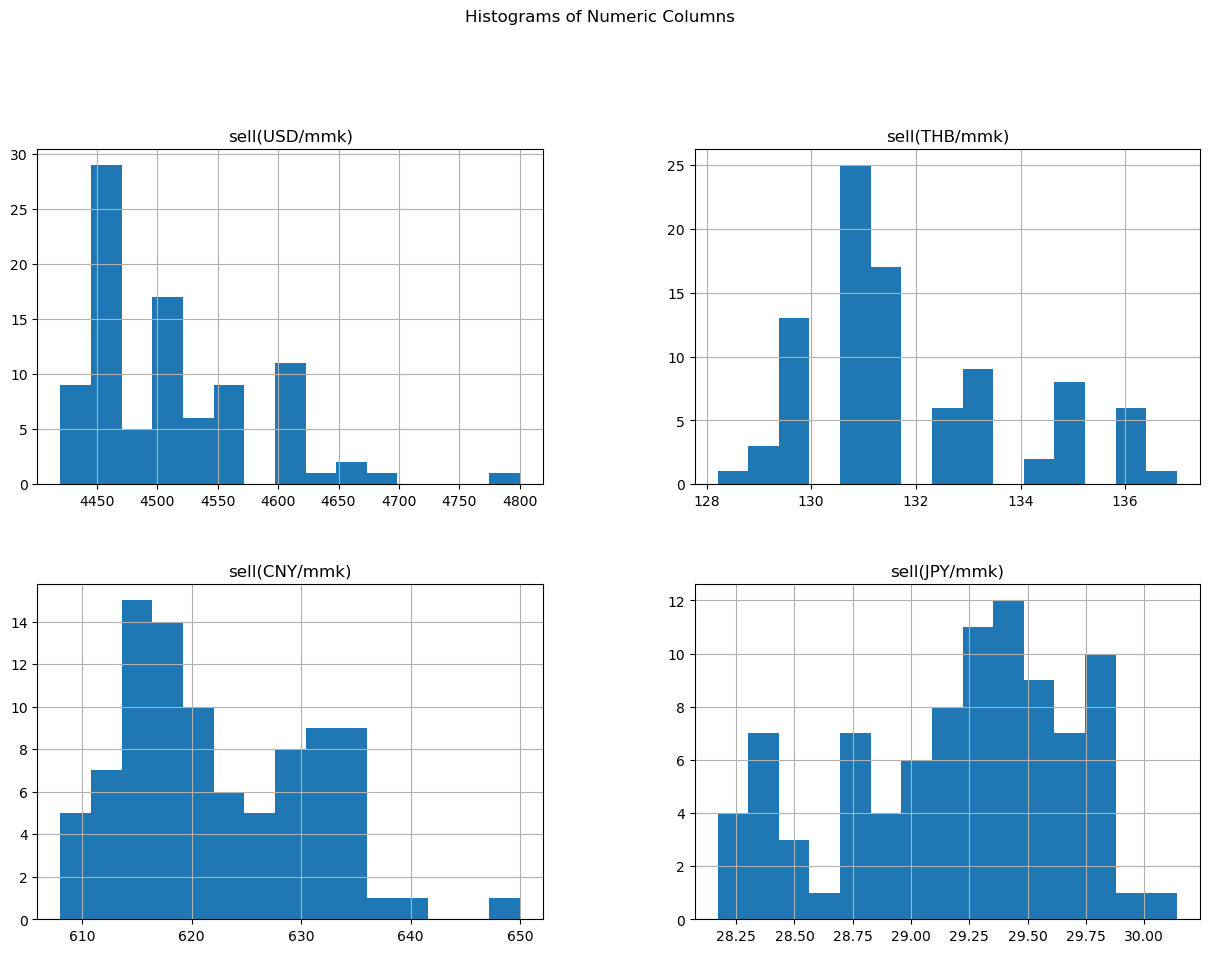


Distribution of Categorical Columns:

Correlation Matrix:


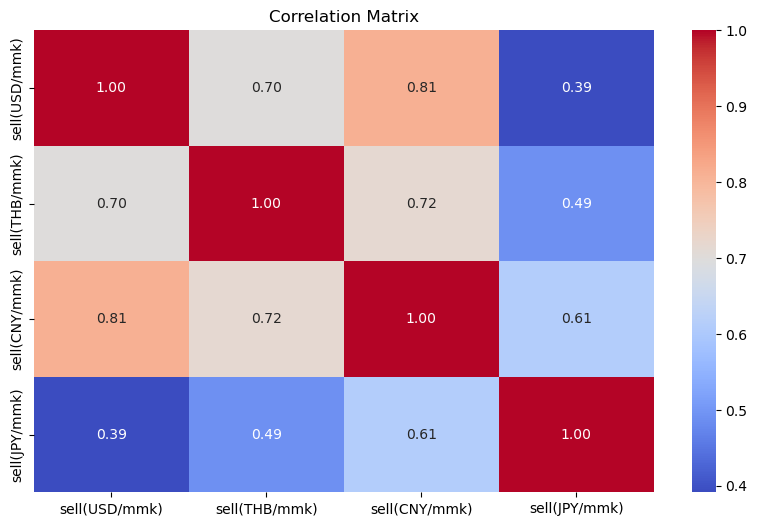


Pairplot for Numeric Columns:


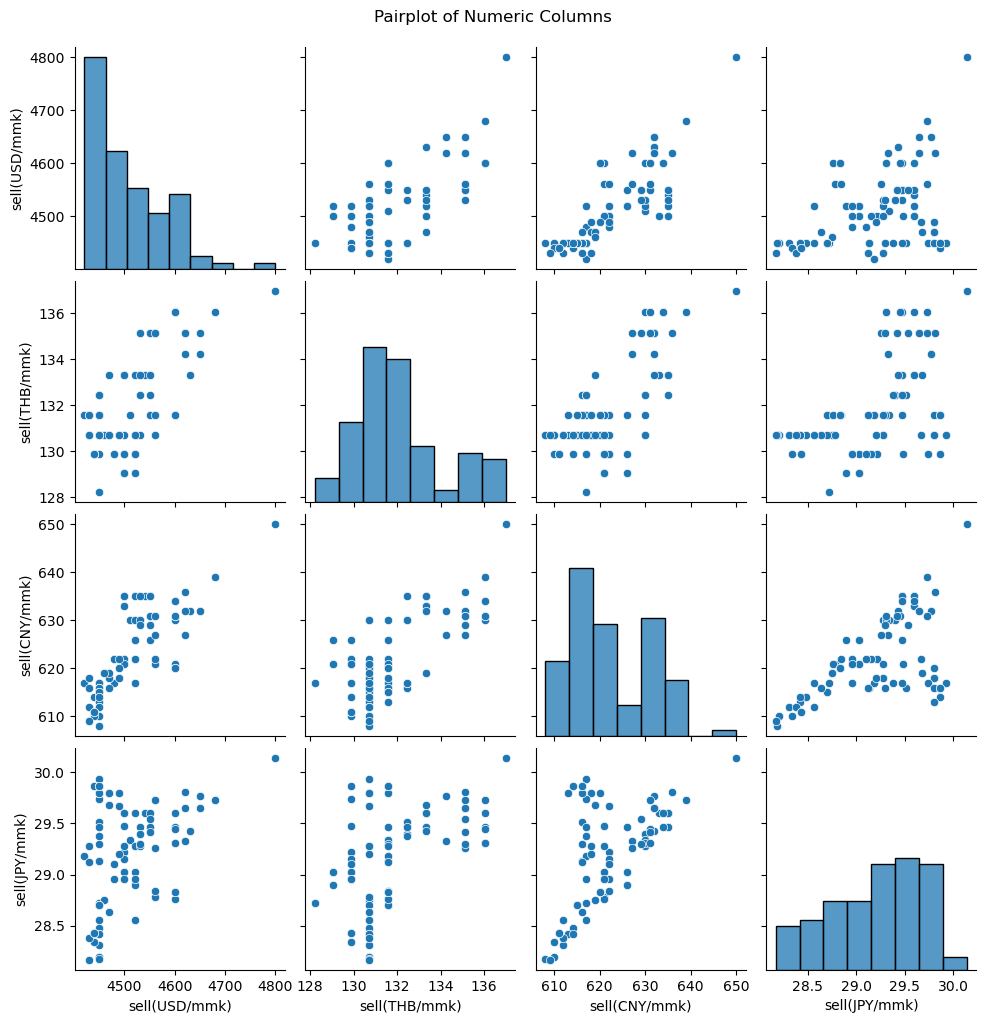


Boxplots for Numeric Columns:


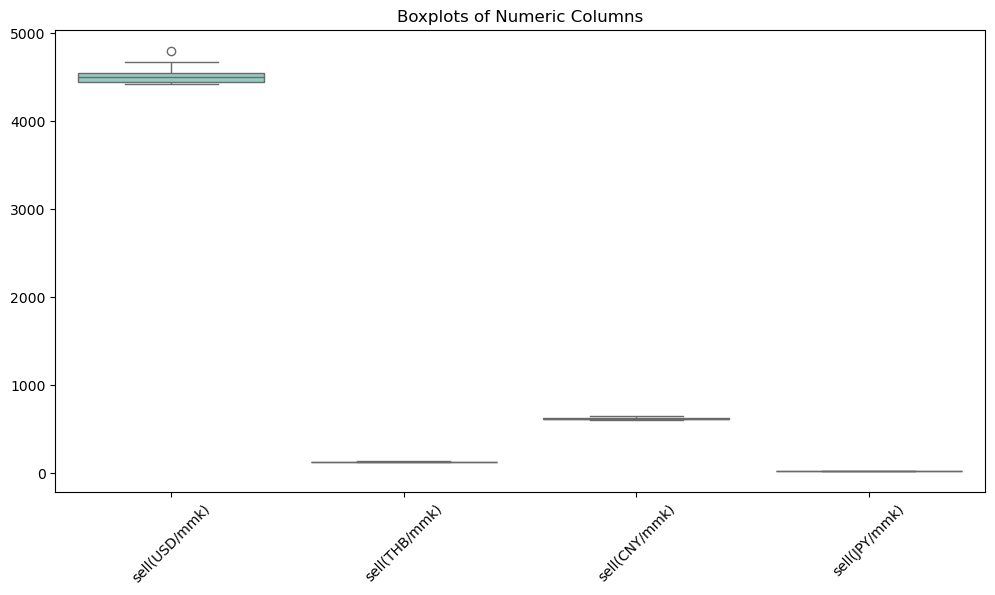


Outlier Detection (Z-score > 3):
Number of Outliers: 1
         Date  sell(USD/mmk)  sell(THB/mmk)  sell(CNY/mmk)  sell(JPY/mmk)
75 2025-01-16           4800         136.99            650          30.14


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    #file_path='project1.xlsx'
    df=pd.read_excel('project1.xlsx')#(file_path,usecols=['sell(USD/mmk)', 'sell(THB/mmk)', 'sell(CNY/mmk)','sell(JPY/mmk)'])

    # df = pd.read_csv('your_dataset.csv')  # For CSV files

    # Display the first few rows of the dataset
    print("First 5 rows of the dataset:")
    print(df.head())

    # Display basic information about the dataset
    print("\nDataset Information:")
    print(df.info())

    # Display summary statistics for numeric columns
    print("\nSummary Statistics for Numeric Columns:")
    print(df.describe())

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Check for duplicate rows
    print("\nNumber of Duplicate Rows:")
    print(df.duplicated().sum())

    # Visualize missing values (if any)
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Values Heatmap")
    plt.show()

    # Visualize the distribution of numeric columns
    print("\nDistribution of Numeric Columns:")
    numeric_df = df.select_dtypes(include=[np.number])
    numeric_df.hist(bins=15, figsize=(15, 10))
    plt.suptitle("Histograms of Numeric Columns", y=1.02)
    plt.show()

    # Visualize the distribution of categorical columns
    print("\nDistribution of Categorical Columns:")
    categorical_df = df.select_dtypes(include=['object'])
    for column in categorical_df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=column, palette='Set2')
        plt.title(f"Distribution of {column}")
        plt.xticks(rotation=45)
        plt.show()

    # Correlation matrix for numeric columns
    print("\nCorrelation Matrix:")
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

    # Pairplot for numeric columns
    print("\nPairplot for Numeric Columns:")
    sns.pairplot(numeric_df)
    plt.suptitle("Pairplot of Numeric Columns", y=1.02)
    plt.show()

    # Boxplots for numeric columns
    print("\nBoxplots for Numeric Columns:")
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=numeric_df, palette='Set3')
    plt.title("Boxplots of Numeric Columns")
    plt.xticks(rotation=45)
    plt.show()

    # Outlier detection using Z-score (for numeric columns)
    from scipy.stats import zscore
    print("\nOutlier Detection (Z-score > 3):")
    z_scores = np.abs(zscore(numeric_df))
    outliers = (z_scores > 3).any(axis=1)
    print(f"Number of Outliers: {outliers.sum()}")
    print(df[outliers])

except FileNotFoundError:
    print("Error: The file was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

In [13]:
import pandas as pd
import numpy as np

# Load the data from the Excel file
file_path = 'project1.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Calculate mean and standard deviation for each currency
currencies = ['sell(USD/mmk)', 'sell(THB/mmk)', 'sell(CNY/mmk)','sell(JPY/mmk)']
results = {}

for currency in currencies:
    mean = df[currency].mean()
    std_dev = df[currency].std()
    
    # Calculate the range within three standard deviations from the mean
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    
    results[currency] = {
        'mean': mean,
        'std_dev': std_dev,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

# Print the results
for currency, values in results.items():
    print(f"Currency: {currency}")
    print(f"  Mean: {values['mean']:.2f}")
    print(f"  Standard Deviation: {values['std_dev']:.2f}")
    print(f"  Lower Bound (Mean - 3*Std Dev): {values['lower_bound']:.2f}")
    print(f"  Upper Bound (Mean + 3*Std Dev): {values['upper_bound']:.2f}")
    print()

Currency: sell(USD/mmk)
  Mean: 4509.34
  Standard Deviation: 70.06
  Lower Bound (Mean - 3*Std Dev): 4299.16
  Upper Bound (Mean + 3*Std Dev): 4719.52

Currency: sell(THB/mmk)
  Mean: 131.93
  Standard Deviation: 2.03
  Lower Bound (Mean - 3*Std Dev): 125.83
  Upper Bound (Mean + 3*Std Dev): 138.04

Currency: sell(CNY/mmk)
  Mean: 622.42
  Standard Deviation: 8.57
  Lower Bound (Mean - 3*Std Dev): 596.70
  Upper Bound (Mean + 3*Std Dev): 648.14

Currency: sell(JPY/mmk)
  Mean: 29.20
  Standard Deviation: 0.49
  Lower Bound (Mean - 3*Std Dev): 27.72
  Upper Bound (Mean + 3*Std Dev): 30.68



In [18]:
import pandas as pd
import numpy as np
from scipy import stats
df=pd.read_excel('project1.xlsx')

# Calculate mean and standard deviation for each currency
currencies = ['sell(USD/mmk)', 'sell(THB/mmk)', 'sell(CNY/mmk)','sell(JPY/mmk)']
results = {}

for currency in currencies:
    mean = df[currency].mean()
    std_dev = df[currency].std()
    n = len(currency)
    median = df[currency].median()
    mode = df[currency].mode()
   
    #Confidence
    confidence_level = 0.95
    
    #Degrees of freedom
    degrees_of_freedom = n-1
    
    #Calculate the critical  t-value
    t_critical = stats.t.ppf((1+confidence_level)/2, degrees_of_freedom)

    #Calculate the margin of error
    margin_of_error = t_critical * (std_dev / np.sqrt(n))
    #Calculate the confidence interval
    low= mean - margin_of_error
    hight= mean + margin_of_error
    median = df[currency].median()

    results[currency] = {
        'mean': mean,
        'std_dev': std_dev,
        'low': low,
        'hight': hight,
        'median': median
    }
  

for currency, values in results.items():
    #Output result
    print(f"Currency: {currency}")
    print("Median:",values['median'],' mmk')
    print(f"Sample Mean: {values['mean']:.2f} mmk")
    print(f"Sample Standard  Deviation: {values['std_dev']:.2f} mmk")
    print(f"95%Confidence Interval for low: {values['low']:.2f} mmk")
    print(f"95%Confidence Interval for hight: {values['hight']:.2f} mmk")
    print()

Currency: sell(USD/mmk)
Median: 4500.0  mmk
Sample Mean: 4509.34 mmk
Sample Standard  Deviation: 70.06 mmk
95%Confidence Interval for low: 4467.00 mmk
95%Confidence Interval for hight: 4551.68 mmk

Currency: sell(THB/mmk)
Median: 131.58  mmk
Sample Mean: 131.93 mmk
Sample Standard  Deviation: 2.03 mmk
95%Confidence Interval for low: 130.70 mmk
95%Confidence Interval for hight: 133.16 mmk

Currency: sell(CNY/mmk)
Median: 621.0  mmk
Sample Mean: 622.42 mmk
Sample Standard  Deviation: 8.57 mmk
95%Confidence Interval for low: 617.24 mmk
95%Confidence Interval for hight: 627.60 mmk

Currency: sell(JPY/mmk)
Median: 29.3  mmk
Sample Mean: 29.20 mmk
Sample Standard  Deviation: 0.49 mmk
95%Confidence Interval for low: 28.90 mmk
95%Confidence Interval for hight: 29.50 mmk



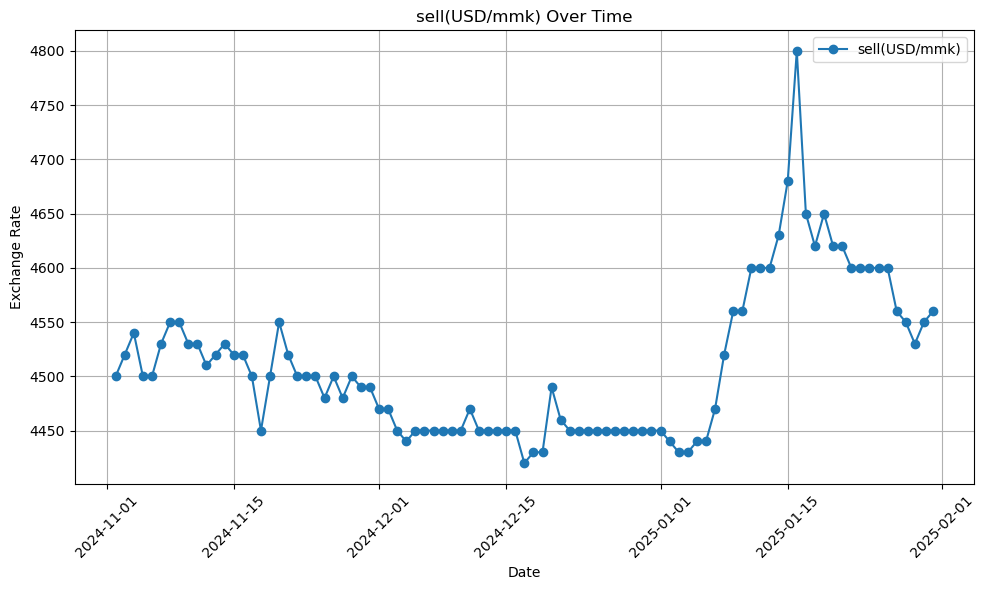

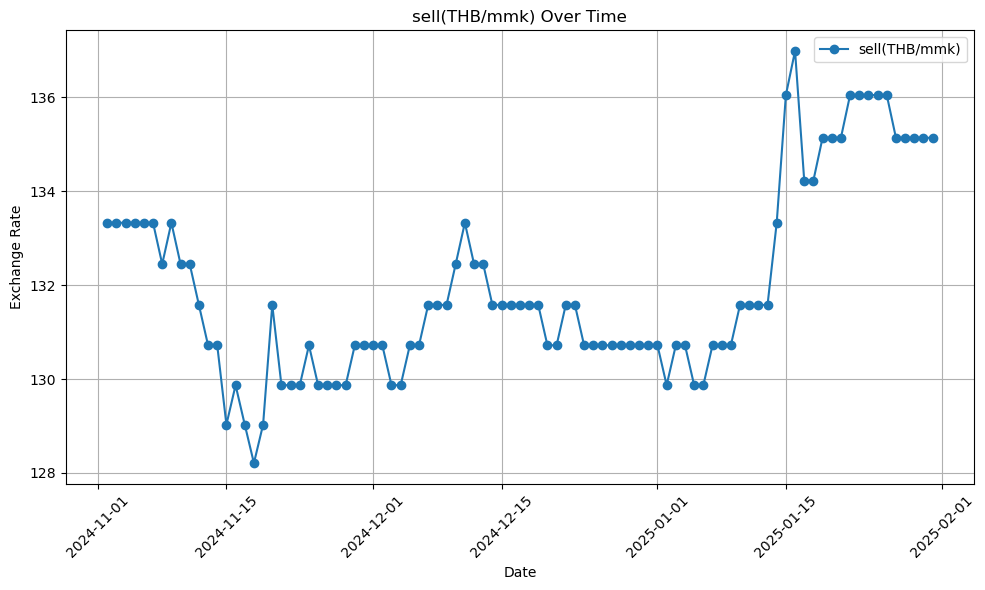

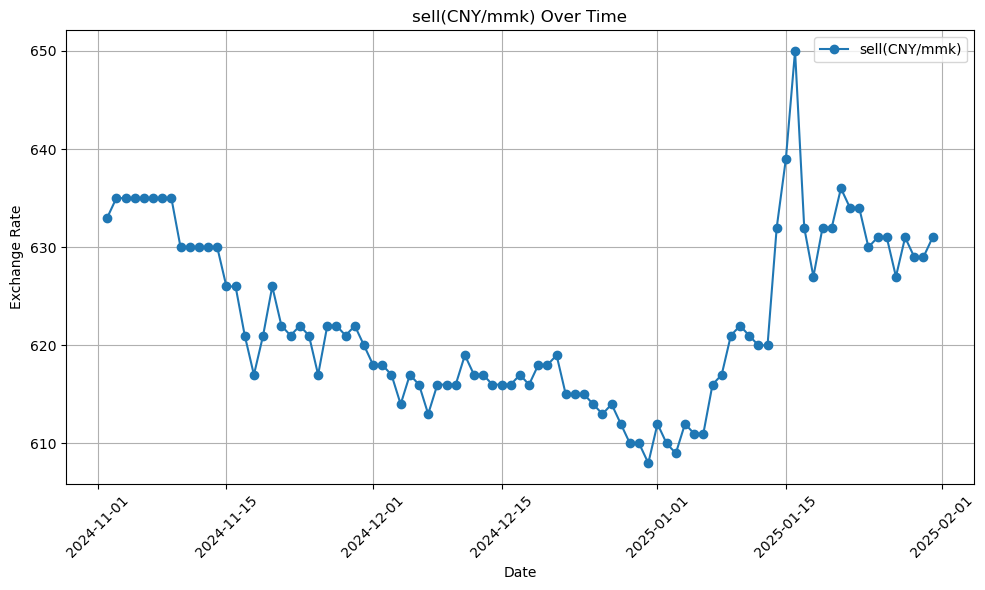

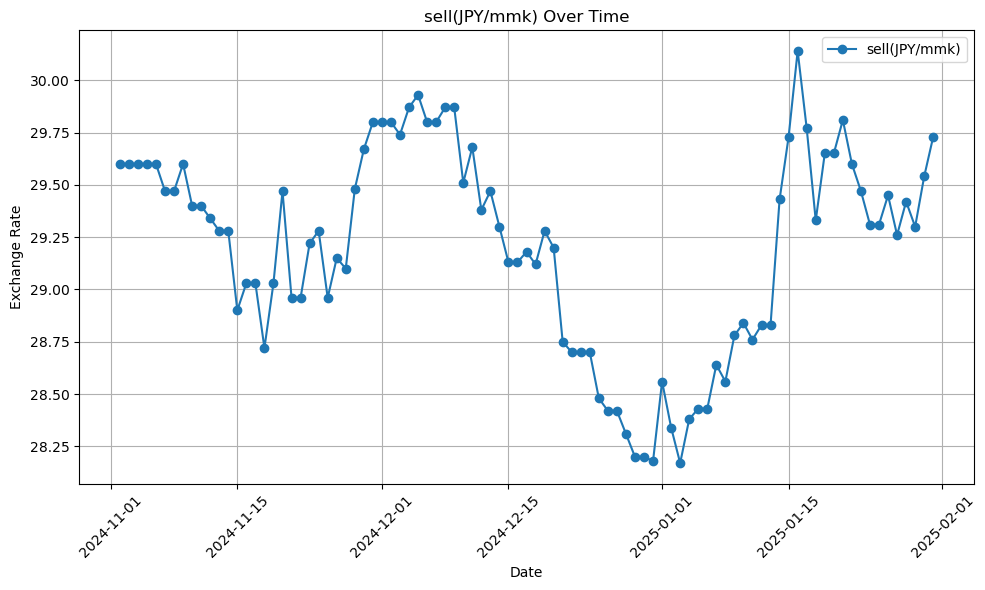

In [20]:
#import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data from the Excel file
file_path = 'project1.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert the 'Date' column to datetime format (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Plot line graphs for each currency
currencies = ['sell(USD/mmk)', 'sell(THB/mmk)', 'sell(CNY/mmk)','sell(JPY/mmk)']

# Create a figure and axis for each currency
for currency in currencies:
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.plot(df['Date'], df[currency], marker='o', linestyle='-', label=currency)
    
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.title(f'{currency} Over Time')
    plt.legend()
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show grid
    plt.grid(True)
    
    # Display the plot
    plt.tight_layout()
    plt.show()
